### Regularization

Import libraries and set display options

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

Create the x and y values

In [2]:
df = pd.read_csv('cosine_df.csv')
df.head()

,x,y
0,0.000000,1.086260
1,0.063467,1.815728
2,0.126933,1.010623
3,0.190400,0.539854
4,0.253866,0.396353


In [3]:
df.shape

(100, 2)

The shape shows the dataframe has 100 rows and 2 columns

In [34]:
print(df.y.mean())

-0.007254917297325034


Below is a scatter plot of x values and y values (with noise), and  line plot of x values and y values (without the noise), same curve displayed on the plot above.

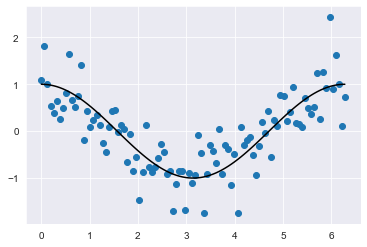

In [4]:
plt.scatter(df.x, df.y)
plt.plot(df.x, np.cos(df.x), color='k')
plt.show()

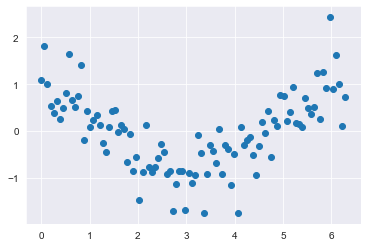

In [5]:
plt.scatter(df.x, df.y)
plt.show()

#### Linear regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
def model_fitter(data, model):
    features = data.drop('y', axis = 1)
    target = data['y']
    model.fit(features, target)
    preds = model.predict(features)
    plt.scatter(data.x, data.y)
    plt.plot(data.x, preds, 'k--')
    plt.show()
    return model

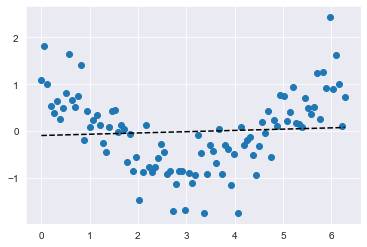

In [8]:
lm = model_fitter(df, LinearRegression())

In [9]:
print(lm.intercept_)
print(lm.coef_)

-0.09248137706996007
[0.02712842]


Introduce the cosine dataframe that has an extra 99 columns consisting random useless values.

We also set the display options to display a maximum of 150 columns so that none of the 101 columns will be hidden.

In [10]:
pd.set_option('display.max_columns', 150)

In [11]:
suspect_df = pd.read_csv('cosine_df_extra_columns.csv')
suspect_df.head()

,x,y,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64,s65,s66,s67,s68,s69,s70,s71,s72,s73,s74,s75,s76,s77,s78,s79,s80,s81,s82,s83,s84,s85,s86,s87,s88,s89,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,0.000000,1.086260,4.510285,4.243360,5.077364,5.775407,0.870371,1.042189,3.288845,1.005865,1.052502,3.175580,5.895522,5.870488,3.903133,2.668519,3.282817,4.094173,0.880424,2.996213,3.118989,1.147824,2.837148,2.839650,0.409650,3.642829,1.642933,1.301822,3.908672,1.028190,6.184563,0.906429,3.453761,5.314957,5.858500,5.133156,4.603108,3.380052,1.475456,3.803071,1.342119,3.534845,5.418094,5.925285,2.783191,2.837559,3.204982,4.144391,5.980749,6.227680,3.752600,5.363106,4.839501,0.960421,0.408669,6.235134,2.954037,2.163008,3.038309,5.987287,5.411146,5.856653,4.570137,4.736102,6.229399,6.073511,0.893500,1.589484,5.690909,5.878595,0.365318,5.848337,3.098962,3.421179,3.973730,3.326170,3.087506,1.867172,4.839791,1.999900,3.886663,2.556170,5.712216,4.048645,5.348714,3.372741,4.380841,1.461631,1.911605,5.457319,3.004112,1.739148,0.401207,2.986740,3.419816,2.210869,4.116052,5.651802,2.931066,1.542499,2.299154
1,0.063467,1.815728,0.300683,2.204225,0.492213,5.097731,0.541594,0.343164,4.840217,4.343630,3.149967,2.076274,1.759298,5.444094,2.938032,4.200197,1.199190,3.979148,1.598494,1.758741,4.024471,3.951020,5.422190,4.514172,4.459619,3.159930,2.901864,0.695287,3.383681,2.629020,2.315087,0.769659,5.558526,2.897195,4.162310,2.788518,1.778288,4.323651,0.896190,3.713252,2.051931,4.212852,2.696321,0.429951,4.825293,0.743045,1.208494,0.011320,1.930851,2.532398,0.326641,3.947482,5.851334,0.134162,3.437023,3.893171,1.756536,1.058794,2.976196,1.201085,5.513009,5.889551,6.090618,0.864594,3.960307,0.682757,4.816860,0.939704,6.267313,6.160211,4.368340,0.290720,5.458159,5.001682,2.887322,6.169497,4.332155,3.736490,2.409075,6.151429,6.208335,3.504041,4.846901,1.929619,2.411624,2.592169,1.236924,1.991130,2.231070,5.871841,1.519105,0.372066,2.432486,1.130922,0.067541,2.857747,5.934834,5.213061,5.579050,4.092146,4.464422
2,0.126933,1.010623,5.934292,4.499745,5.629712,0.721088,4.499597,1.054771,3.207139,2.356321,2.537807,1.889433,4.656596,4.494877,1.194202,4.760009,1.207124,3.588651,4.299645,2.416517,5.071783,1.871949,5.002775,3.996491,2.397042,2.290254,5.528217,1.017353,1.718960,5.290628,5.531407,0.835479,1.563958,4.339918,2.985258,1.966871,3.504641,5.421886,1.755435,5.266469,1.076330,2.430177,3.066581,6.143974,2.935596,5.280540,3.903075,4.433316,2.250051,4.321500,0.803964,4.673700,4.370303,4.670778,4.273211,0.132446,3.980181,3.759853,5.298938,0.398279,1.049623,1.362105,0.049970,6.213079,5.819508,6.259281,3.599359,4.525876,0.989356,2.649699,0.107822,2.293262,2.864385,4.091935,6.132996,5.655899,3.972261,4.055669,4.399490,1.990648,0.988087,2.996496,6.040177,2.232170,2.774042,6.055675,2.695219,1.535565,0.155993,2.990297,1.929394,0.254268,3.335856,5.061090,0.854903,1.861820,0.216191,4.707951,1.171044,3.402163,5.652485
3,0.190400,0.539854,4.312653,1.798761,6.126937,0.804294,4.019667,5.314475,3.989411,2.739722,3.497290,1.722815,6.185798,4.289519,2.196523,4.345576,1.969896,2.191259,0.942655,3.874540,1.176396,5.422721,1.962456,6.161889,2.249732,4.839469,1.383888,4.113686,4.296099,4.355895,1.858601,4.973328,3.050362,0.032895,5.773996,2.074032,1.523783,2.329209,0.970743,5.725764,3.163545,1.827271,5.849702,1.636496,2.248112,1.238136,0.406243,3.651160,3.227052,1.671514,1.675202,2.496149,5.247725,4.076593,0.113816,2.536973,0.913940,4.666268,5.025258,1.228076,3.532962,3.878686,5.955161,4.445355,5.922151,1.837340,2.228289,0.254234,5.875696,3.738087,0.538353,3.082641,4.559514,0.776358,4.498631,2.356502,2.334325,1.920327,3.121354,3.930723,5.660037,0.922580,0.415104,5.080458,4.569396,6.111622,5.518925,0.470294,1.277002,1.263333,1.807333,0.749275,0.430104,3.887071,0.294676,0.168721,4.298122,

Linear regression using the suspect dataframe

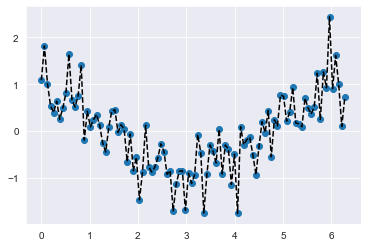

In [12]:
lm_s = model_fitter(suspect_df, LinearRegression())

In [13]:
print(lm_s.coef_)

[ 0.12545625  0.04295709 -0.32786622  0.68709241  0.79960897 -0.0759029
  0.31937216 -0.08338967  0.11171185 -0.25149351 -0.11466209 -0.92362039
 -0.12160984  0.49227891 -0.19090287  0.13148428  0.08527617 -0.40611847
  0.5497734  -0.07171084  0.01162257  0.66693195  0.34007688  1.31327419
  0.44742998 -0.25867383 -0.60830195 -0.33352887  0.20428737  0.05564289
  0.03360015  0.27185582 -0.21243248 -0.11368265 -0.55457255  0.32382744
  0.42497822 -0.12919633  0.27463646  0.02154112  0.1429631   0.03939341
  0.22001404 -0.24818032 -0.90826639 -0.01876551  0.11551333 -0.72066701
 -0.08944441  0.14454445 -0.67335899  0.31584174  0.46192359 -0.07653485
  0.41926446 -0.03528771  0.2494901   0.51067128  0.24961631 -0.2852483
 -0.03962524 -0.13503772  0.67903466 -0.36926611  0.86692384  0.13710873
 -0.01765944  0.07235699  0.35846122 -0.09957234 -0.39424457  0.08695239
  0.2436064  -0.7897442  -0.01349169 -0.10872683 -0.37688466 -0.1696458
 -0.75909188 -0.50689192 -0.23359696 -0.45496516  0.52

## Introducing regularization
From now on, we are working with the suspect dataframe that contains the useless 99 columns

In [14]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

#### Lasso
Default alpha value is 1.0

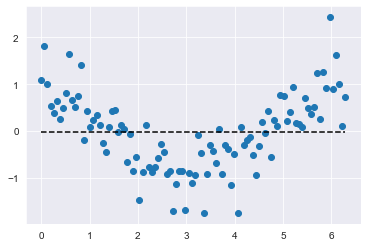

In [15]:
from sklearn.linear_model import Lasso
lasso = model_fitter(suspect_df, Lasso(random_state=2021))

In [16]:
print(lasso.coef_)

[ 0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0. -0.
  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0.  0.
  0. -0.  0. -0. -0.  0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.
 -0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0.
 -0.  0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0. -0. -0. -0.  0.
 -0.  0.  0. -0. -0. -0.  0.  0. -0.  0.]


Change the alpha value to 0.1

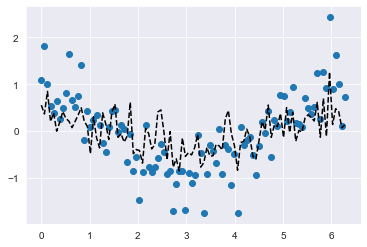

In [17]:
lasso_point1 = model_fitter(suspect_df, Lasso(random_state=1234, alpha=0.1))

Lasso alpha 1.0 is completely underfit. 0.1 is abit overfit. Probably best is between 0.1 and 1.0

In [18]:
print(lasso_point1.coef_)

[ 0.          0.10287529 -0.03081364 -0.          0.00650775  0.
 -0.01051762  0.          0.         -0.         -0.         -0.
  0.          0.         -0.         -0.          0.         -0.
  0.04708886  0.01524485 -0.          0.02670357  0.          0.
 -0.          0.          0.         -0.          0.         -0.
 -0.          0.         -0.         -0.         -0.01056309  0.
  0.00912723 -0.09452236  0.         -0.05608879  0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.02136426 -0.          0.05842095  0.02678219 -0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.0171021   0.         -0.         -0.          0.
 -0.00467002  0.         -0.          0.          0.          0.
 -0.          0.          0.02588505 -0.          0.0396652   0.
 -0.         -0.          0.01658656  0.         -0.         -0.0984703
  0.          0.02639863 -0.         -0.01251884 -0.          0.01677637
 -0.      

Use a for loop to test out different alpha values between 0.01 and 1.0

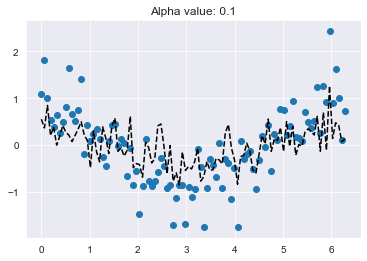

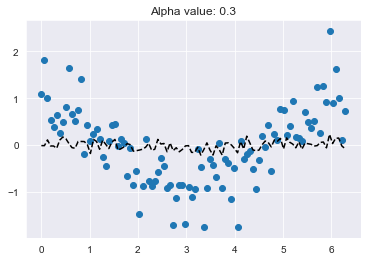

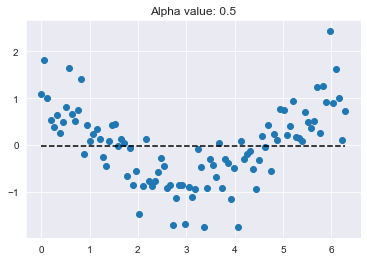

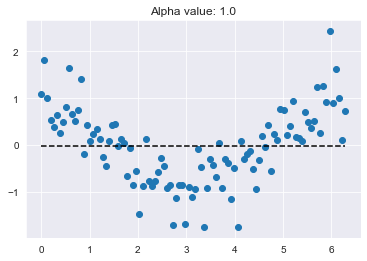

In [19]:
values = [0.1, 0.3, 0.5, 1.0]
for n in values:
    plt.title('Alpha value: {}'.format(n))
    model_fitter(suspect_df, Lasso(random_state=2021, alpha = n))

### Ridge Regression
Default alpha value is 1.0

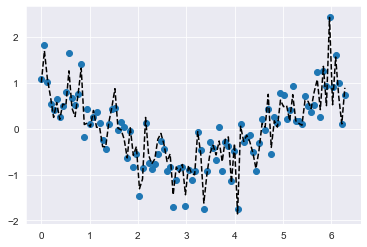

In [20]:
from sklearn.linear_model import Ridge
ridge = model_fitter(suspect_df, Ridge(random_state=2021))

In [21]:
print(ridge.coef_)

[ 0.13624424  0.14528103 -0.17541596  0.16850334  0.22622412  0.03241608
  0.15223126  0.02584907 -0.05183528 -0.1532724  -0.02255759 -0.35976501
  0.04200298  0.15163331 -0.05645469 -0.16533803  0.05994049 -0.21356503
  0.27555263 -0.02486547 -0.0461282   0.28130881  0.06294631  0.47533745
  0.20435567 -0.20784214 -0.25863373 -0.11508004  0.12903911  0.03730711
 -0.01784741  0.16405215 -0.14712879 -0.14794406 -0.12267858  0.0292977
  0.23691743 -0.17043221  0.03435667 -0.08417636 -0.0102021  -0.10592995
  0.04365849 -0.09203492 -0.31083645 -0.01030632 -0.05789161 -0.37408699
  0.00629393  0.02201016 -0.18292252  0.14316761  0.0796647  -0.20904399
  0.19316244  0.02322913  0.11015144  0.26305752  0.15467466 -0.02462031
 -0.0117442  -0.03031109  0.31026895 -0.07744192  0.34564428  0.20154114
 -0.05647562  0.03463238 -0.031454    0.04634045 -0.04291229  0.1492014
  0.08710448 -0.32320279  0.07392919 -0.173146   -0.03809694  0.00103176
 -0.35115679 -0.19996238  0.00569677 -0.14640076  0.1

Using ridge's default, we see that the model is overfit, meaning the coefficients are large and we need to shrink them so as to shrink the effect of the noisy columns. So to push more coefficients closer to zero, we need to increase the alpha size.After some experimentations, I concluded that the alpha size need to be way large to take care of the overfitting problem.

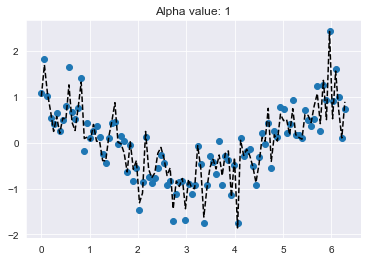

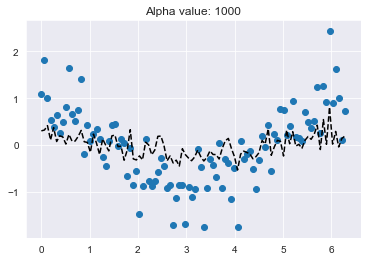

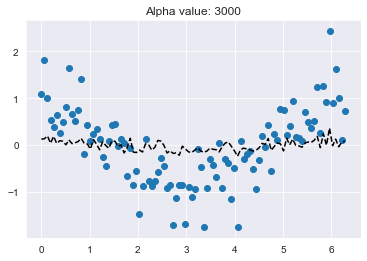

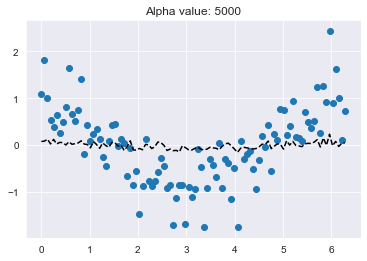

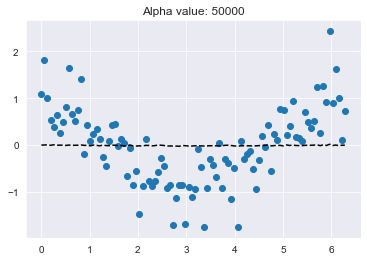

In [22]:
values = [1, 1000, 3000, 5000, 50000]
for n in values:
    plt.title('Alpha value: {}'.format(n))
    model_fitter(suspect_df, Ridge(random_state=2021, alpha = n))

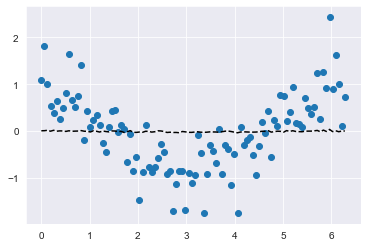

In [23]:
ridge_30000 = model_fitter(suspect_df, Ridge(random_state=2021, alpha = 30000))

In [24]:
print(ridge_30000.coef_)

[ 3.06686667e-04  1.24924159e-03 -6.22136858e-04 -5.72384831e-05
  6.73340484e-04  4.36422214e-05 -9.26584029e-04  5.03310565e-04
  2.68649829e-04 -3.27398886e-04 -3.10243338e-04 -4.99024416e-04
 -1.31337346e-04  6.22342064e-05 -2.42546296e-04 -3.75719792e-05
  3.36086916e-04 -7.51081189e-04  1.15043444e-03  7.57326824e-04
 -3.24172487e-04  7.79105653e-04  5.15613255e-04 -3.23756087e-04
  6.22292455e-05  9.96307614e-05  5.77691816e-05 -2.92507963e-04
  3.88522705e-04 -1.06209681e-04 -1.69045848e-04  3.47297259e-04
 -2.93129739e-06 -1.75053299e-04 -7.21278014e-04  5.84528528e-04
  7.23703336e-04 -1.03178025e-03  2.28134714e-05 -9.76467524e-04
 -1.56237495e-04  4.84234617e-04  1.79496436e-04  1.16096788e-04
 -4.94778018e-04 -2.04421485e-04 -1.18849403e-04  3.27464950e-04
  9.11268455e-04 -3.05389661e-04  1.21500416e-03  5.88351626e-04
  6.71339115e-05 -4.77735995e-04 -5.67554085e-04 -1.21790916e-04
  8.40742186e-05 -1.75897512e-05 -6.30067235e-05 -5.78748030e-04
  7.76731686e-05  8.75005

Even when the model is underfit, the coefficients are not zero, but very close to zero.

### ElasticNet
The defaults are alpha=1.0 and l1_ratio=0.5

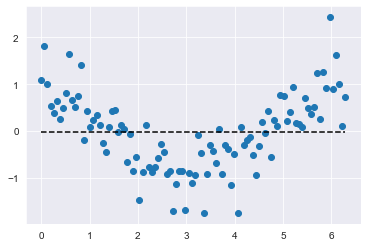

In [25]:
from sklearn.linear_model import ElasticNet
enet = model_fitter(suspect_df, ElasticNet(random_state=2021))

In [26]:
print(enet.coef_)

[ 0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0. -0.
  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0.  0.
  0. -0.  0. -0. -0.  0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.
 -0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0.
 -0.  0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0. -0. -0. -0.  0.
 -0.  0.  0. -0. -0. -0.  0.  0. -0.  0.]


All coefficients have been pushed to 0. This looks very much like the lasso

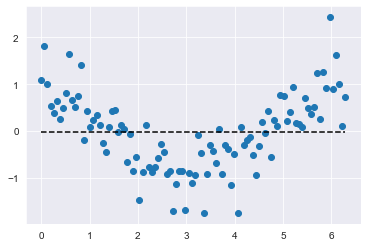

In [27]:
enet_point9 = model_fitter(suspect_df, ElasticNet(random_state=2021, l1_ratio = 0.9))

In [28]:
enet_point9.coef_

array([ 0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
        0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.,
       -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.,  0.,
        0., -0., -0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  0.,
        0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0., -0.,
        0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.])

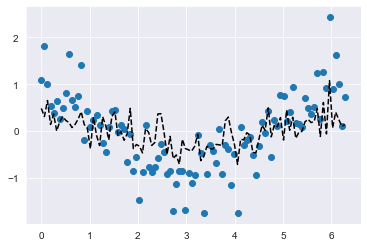

In [29]:
enet_point1 = model_fitter(suspect_df, ElasticNet(random_state=2021, l1_ratio = 0.1))

In [30]:
print(enet_point1.coef_)

[ 0.          0.07494067 -0.02007245 -0.          0.01181753  0.
 -0.01567473  0.          0.         -0.         -0.         -0.00176485
 -0.          0.         -0.         -0.          0.         -0.00435994
  0.03977733  0.01383055 -0.          0.02207078  0.00051836 -0.
 -0.          0.          0.         -0.          0.         -0.
 -0.          0.         -0.         -0.         -0.01471898  0.00700861
  0.01303752 -0.06218747  0.         -0.03967898  0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.02385577 -0.          0.04884851  0.02038148 -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.          0.01878023  0.         -0.          0.          0.
 -0.00701394 -0.          0.          0.          0.          0.
 -0.          0.00420584  0.01403087 -0.          0.03280843  0.
 -0.         -0.          0.0141978   0.         -0.         -0.07170226
  0.          0.0232905  -0.         -0.00981646 -0.      

Use a for loop to test out different alpha values for the elastic net

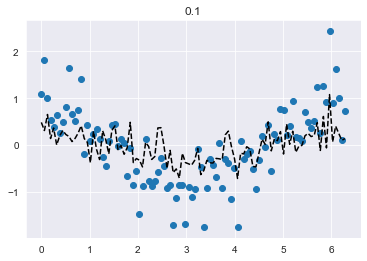

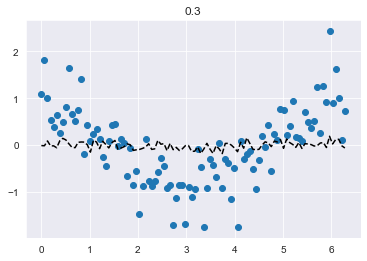

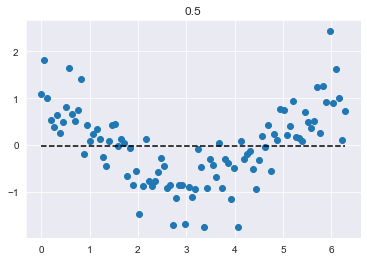

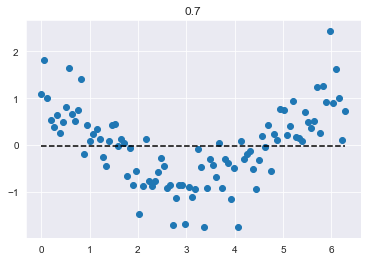

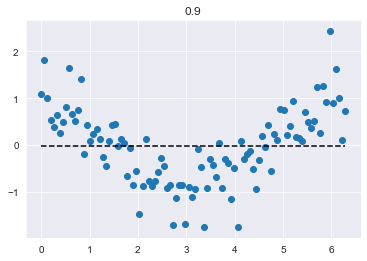

In [31]:
values = [0.1, 0.3, 0.5, 0.7, 0.9]
for n in values:
    plt.title(n)
    model_fitter(suspect_df, ElasticNet(random_state=2021, l1_ratio=n))